### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Warnings

In [2]:
import warnings 
warnings.filterwarnings('ignore')

### Adjust Views

In [3]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)

## 1. Understanding the Data
### Loading the Data

In [4]:
app_data= pd.read_csv(r'F:\Data science\Up grad\Python\Data Toolkit\EDA\assignment\application_data.csv')
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
pre_data= pd.read_csv(r'F:\Data science\Up grad\Python\Data Toolkit\EDA\assignment\previous_application.csv')
pre_data.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


### Exmine Data Frame

In [6]:
# Shape of Data Frame
print('application_data:',app_data.shape)
print('previous_application:',pre_data.shape)

application_data: (307511, 122)
previous_application: (1670214, 37)


In [7]:
# application_data columns detail:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# previous_application columns detail
pre_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# 2. Data Cleaning & manipulation

## Missing Value calculate

### Application_ data Missing value

In [9]:
# null percentage value in each column
null_value = app_data.isnull().mean().sort_values(ascending= False)
null_per = null_value*100

In [10]:
# how many columns have more than or equal to 35% missing values?
len(null_per[null_per>=35.0])

49

## There are 49 columns in application_data high missing value. We will plan to drop the ones with missing value percentage more than 35% 

### previous_application Missing Values

In [11]:
null_pre_value= pre_data.isnull().mean().sort_values(ascending= False)
null_cent= null_pre_value*100
null_cent

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [12]:
len(null_cent[null_cent >=35])

11

## There are 11 columns in previous_Data high missing percentage. We will plan to Drop the ones with missing value percentage more than 35%

## Deleting columns with null percentage more than 35% from application_data

In [13]:
col_to_drop= null_per[null_per>=35.0].keys()
df1 = app_data.drop(col_to_drop, axis= 1)
df1

print('Before deletion rows, columns', app_data.shape)
print('After deletion rows, columns', df1.shape)

Before deletion rows, columns (307511, 122)
After deletion rows, columns (307511, 73)


## Deleting columns with null percentage more than 35% from Previous_data

In [14]:
col_to_drop= null_cent[null_cent>=35.0].keys()
df2 = pre_data.drop(col_to_drop, axis= 1)
df2
print('Before deletion rows, columns', pre_data.shape)
print('After deletion rows, columns', df2.shape)

Before deletion rows, columns (1670214, 37)
After deletion rows, columns (1670214, 26)


## imputing missing values

In [15]:
df1.isnull().mean().sort_values(ascending= False)

OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


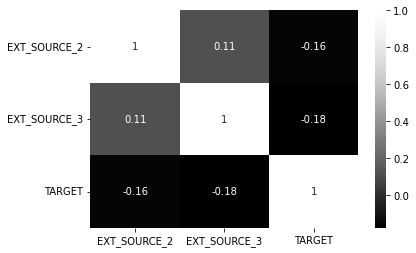

In [16]:
# checking correlation of EXT_source_x columns vs target column
EXT_source_x= df1[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
corrl= EXT_source_x.corr()
x= sns.heatmap(corrl, annot = True, cmap= 'Greys_r')

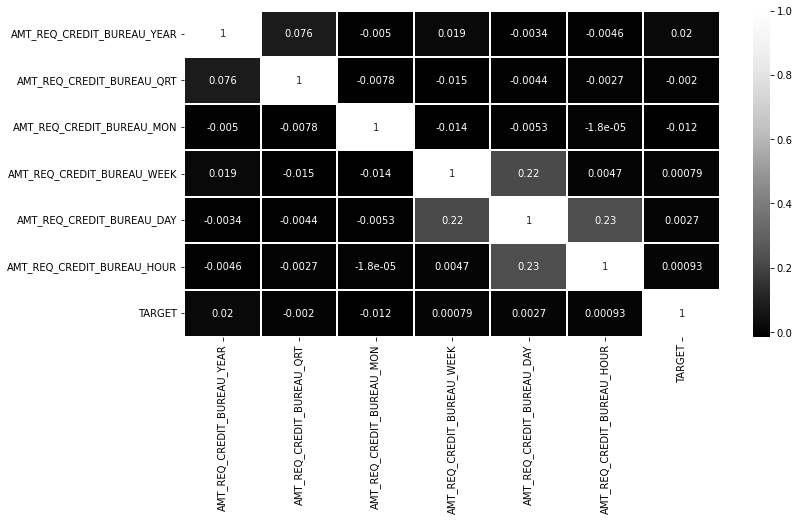

In [17]:
# checking correlation of AMT_REQ_CREDIT_XX columns vs target column
ARC= df1[['AMT_REQ_CREDIT_BUREAU_YEAR', 
'AMT_REQ_CREDIT_BUREAU_QRT',  
'AMT_REQ_CREDIT_BUREAU_MON',     
'AMT_REQ_CREDIT_BUREAU_WEEK',     
'AMT_REQ_CREDIT_BUREAU_DAY',      
'AMT_REQ_CREDIT_BUREAU_HOUR', 'TARGET']]
plt.figure(figsize=[12,6])
corrl=ARC.corr()
x= sns.heatmap(corrl, annot=True, cmap='Greys_r', linewidths= .3)

## there is no correlation between AMT_REQ_CREDIT_XX vs target

## Data imputation for Application_data

In [18]:
# high null value in ' OCCUPATION_TYPE'
df1['OCCUPATION_TYPE'].fillna(value='missing', inplace= True)

In [19]:
# there is almost no correlation between EXT_source_x columns vs target column
# EXT_source3 has 19.8% missing value, Hence imputing with median 
df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].median(), inplace= True)

In [20]:
# imputing 13% missing values with mode
df1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df1['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
df1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)

In [21]:
# this is an object category with .42% missing value
# hence imputing with mode 
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode()[0], inplace= True)

In [22]:
# imputing which has less than 1% of missing value with median
df1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
df1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
df1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df1['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
df1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df1['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
df1['EXT_SOURCE_2'].fillna(df1['EXT_SOURCE_2'].median(), inplace= True)
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median(), inplace= True)
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median(), inplace= True)
df1['CNT_FAM_MEMBERS'].fillna(df1['CNT_FAM_MEMBERS'].median(), inplace= True)
df1['DAYS_LAST_PHONE_CHANGE'].fillna(df1['DAYS_LAST_PHONE_CHANGE'].median(), inplace= True)

#### Cheking the missing value after imputing

In [23]:
df1.isnull().mean().sort_values(ascending= False)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

## imputing null value in previous_application file

In [24]:
df2.isnull().mean().sort_values(ascending= False)

AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
CODE_REJECT_REASON             0.000000e+00
NAME_YIELD_GROUP               0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
SELLERPLACE_AREA               0.000000e+00
CHANNEL_TYPE                   0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_GOODS_CATEGORY            0.000000e+00
NAME_CLIENT_TYPE               0.000000e+00
SK_ID_PREV                     0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
WEEKDAY_APPR_PROCESS_START     0

# AMT_GOODS_PRICE

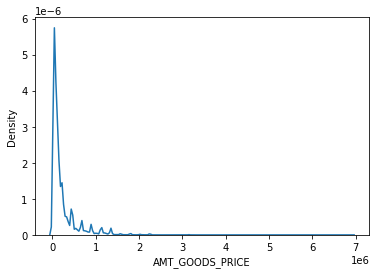

In [25]:
sns.kdeplot(df2['AMT_GOODS_PRICE'])
plt.show()

## There are several peaks along the distribution of data imputed with mode in this case

In [26]:
# impute AMT_GOODS_PRICE with mode
df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].mode()[0], inplace= True)

# AMT_ANNUITY

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

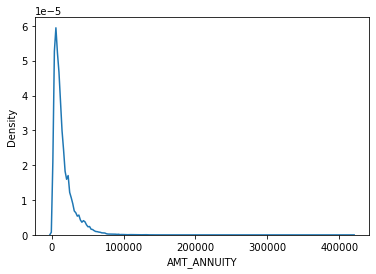

In [27]:
sns.kdeplot(df2['AMT_ANNUITY'])

### There is a single peak at the left side of the distribution , hence imputing with median

In [28]:
## impute AMT_ANNUITY with median
df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median(), inplace= True)

In [29]:
# impute CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loan not started
df2['CNT_PAYMENT'].fillna(0, inplace= True)

In [30]:
# checking the missing value after imputing value
df2.isnull().sum()/ df2.shape[0]*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.000000


## we still have few missing value in product_combination 
## we can ignore as this percentage is very less

## CODE_GENDER

In [31]:
df1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [32]:
# there are 4 'XNA' values in CODE_GENDER column which can be imputed by female 
# because its value is  65% of total record
df1.loc[df1.CODE_GENDER== 'XNA', 'CODE_GENDER']= 'F'

In [33]:
# converting negative days to positive days
dt_positive= [col for col in df1 if col.startswith('DAYS')]
for col in dt_positive:
    df1[col]= abs(df1[col])

## CNT_FAM_MEMBERS

In [34]:
df1['CNT_FAM_MEMBERS'].value_counts()

2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [35]:
df1['CNT_FAM_MEMBERS']= df1['CNT_FAM_MEMBERS'].astype(int)
df1['CNT_FAM_MEMBERS'].value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [37]:
# conversion of object to categorical columns
object_col= ['NAME_CONTRACT_TYPE',           
  'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for col in object_col:
    df1[col]= pd.Categorical(df1[col])

In [38]:
# conversion of some numerical columns to categorical columns
nume_col= ['WEEKDAY_APPR_PROCESS_START','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION']
for col in nume_col:
    df1[col]= pd.Categorical(df1[col])

In [39]:
# after conversion
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [41]:
# converting negative days to positive days
df2['DAYS_DECISION']= abs(df2['DAYS_DECISION'])

In [42]:
# coverting object to categorical
o= df2.select_dtypes(object)
op= list(o.columns.values.tolist())
for col in op:
    df2[col]= pd.Categorical(df2[col])

In [43]:
# after conversion
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

# 3. Identifying the outliers

## identify outlier in application_data

<Figure size 3024x1800 with 0 Axes>

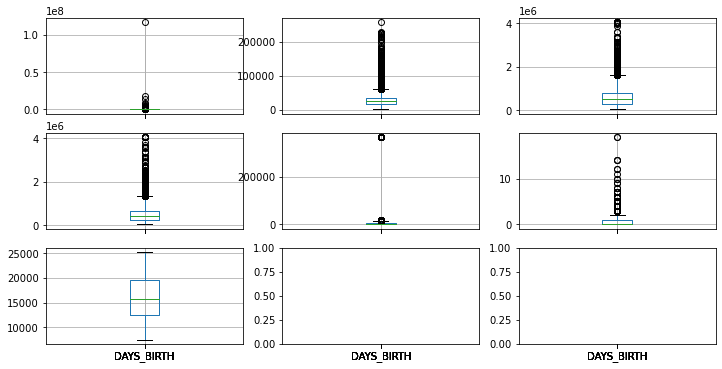

In [94]:
plt.figure(figsize= [42,25])
fig, axes= plt.subplots(3,3, sharex= True, figsize=(12,6))
a1=df1.boxplot(column='AMT_INCOME_TOTAL', ax=axes[0,0],)
a2=df1.boxplot(column='AMT_ANNUITY', ax=axes[0,1])
a3=df1.boxplot(column='AMT_CREDIT', ax=axes[0,2])
a4=df1.boxplot(column='AMT_GOODS_PRICE', ax=axes[1,0])
a5=df1.boxplot(column='DAYS_EMPLOYED', ax=axes[1,1])
a6=df1.boxplot(column='CNT_CHILDREN', ax=axes[1,2])
a7=df1.boxplot(column='DAYS_BIRTH', ax=axes[2,0])
plt.show()
a1.title.set_text('AMT_INCOME_TOTAL')
a2.title.set_text('AMT_ANNUITY')
a3.title.set_text('AMT_CREDIT')
a4.title.set_text('AMT_GOODS_PRICE')
a5.title.set_text('DAYS_EMPLOYED')
a7.title.set_text('DAYS_BIRTH')
a6.title.set_text('CNT_CHILDREN')


### Result:
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE ,CNT_CHILDREN have outliers.
- AMT_INCOME_TOTAL has more number of outlier which idicate some cumstomer have high income compare to others.
- DAYS_BIRTH has no outlier.
- DAYS_EMPLOYED has outlier around 900 years which is impossible and hence this has to be incorrect entry.

In [45]:
# observation statists for these colomns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df1[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE' ,'CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000
mean,27108.48784,599025.99971,538316.29437,0.41705,168797.91930,16036.99507,67724.74215
std,14493.46107,402490.77700,369288.98225,0.72212,237123.14628,4363.98863,139443.75181
min,1615.50000,45000.00000,40500.00000,0.00000,25650.00000,7489.00000,0.00000
25%,16524.00000,270000.00000,238500.00000,0.00000,112500.00000,12413.00000,933.00000
50%,24903.00000,513531.00000,450000.00000,0.00000,147150.00000,15750.00000,2219.00000
75%,34596.00000,808650.00000,679500.00000,1.00000,202500.00000,19682.00000,5707.00000
max,258025.50000,4050000.00000,4050000.00000,19.00000,117000000.00000,25229.00000,365243.00000


## Identify outlier in previous_application

<Figure size 3024x1800 with 0 Axes>

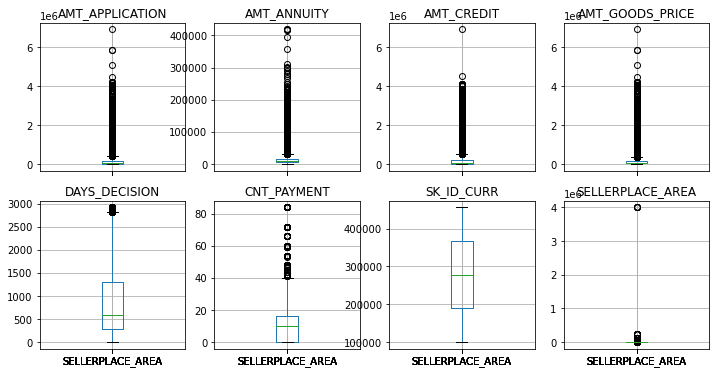

In [46]:
plt.figure(figsize= [42,25])
fig, axes= plt.subplots(2,4, sharex= True, figsize=(12,6))
a1=df2.boxplot(column='AMT_APPLICATION', ax=axes[0,0],)
a2=df2.boxplot(column='AMT_ANNUITY', ax=axes[0,1])
a3=df2.boxplot(column='AMT_CREDIT', ax=axes[0,2])
a4=df2.boxplot(column='AMT_GOODS_PRICE', ax=axes[0,3])
a5=df2.boxplot(column='DAYS_DECISION', ax=axes[1,0])
a6=df2.boxplot(column='CNT_PAYMENT', ax=axes[1,1])
a7=df2.boxplot(column='SK_ID_CURR', ax=axes[1,2])
a8=df2.boxplot(column='SELLERPLACE_AREA', ax=axes[1,3])
a1.title.set_text('AMT_APPLICATION')
a2.title.set_text('AMT_ANNUITY')
a3.title.set_text('AMT_CREDIT')
a4.title.set_text('AMT_GOODS_PRICE')
a5.title.set_text('DAYS_DECISION')
a6.title.set_text('CNT_PAYMENT')
a7.title.set_text('SK_ID_CURR')
a8.title.set_text('SELLERPLACE_AREA')
plt.show()

# Result :
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA Have large number of outliers.
- CNT_PAYMENT, DAYS_DECISION  have  few outlier values.
- SK_ID_CURR has no outlier.

In [47]:
# observation of these columns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df2[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION' ]].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1670214.00000,1670214.00000,1670213.00000,1670214.00000,1670214.00000,1670214.00000,1670214.00000
mean,14906.50618,175233.86036,196114.02122,185642.88579,313.95112,12.47621,880.67967
std,13177.51410,292779.76239,318574.61655,287141.31609,7127.44346,14.47588,779.09967
min,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,1.00000
25%,7547.09625,18720.00000,24160.50000,45000.00000,-1.00000,0.00000,280.00000
50%,11250.00000,71046.00000,80541.00000,71050.50000,3.00000,10.00000,581.00000
75%,16824.02625,180360.00000,216418.50000,180405.00000,82.00000,16.00000,1300.00000
max,418058.14500,6905160.00000,6905160.00000,6905160.00000,4000000.00000,84.00000,2922.00000


# 4. Data Analysis
### Imbalance Analysis 

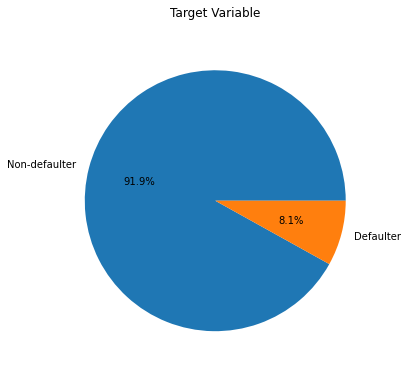

In [91]:
# observation imbalance in pie chart
plt.figure(figsize=[6,6])
plt.pie(df1['TARGET'].value_counts(), labels=['Non-defaulter','Defaulter'], autopct='%1.1f%%')
plt.title('Target Variable\n', fontdict={'color': 'black'} )
plt.show()

## Ratio of imbalance:

In [92]:
# dividing into two dataset depending upon the target
target0= df1[df1['TARGET']==0]
target1=df1[df1['TARGET']==1]
# find the percentage of different dataframe
tar0=target0.shape[0]
tar1= target1.shape[0]
per_tar0= tar0/(tar0+tar1)*100
per_tar1=tar1/(tar0+tar1)*100

# find the ratio of imbalance:
print('Ratio of imbalance for Non-defaulter and defaulter :', (per_tar0/per_tar1),':1 ')


Ratio of imbalance for Non-defaulter and defaulter : 11.387150050352469 :1 


### Ratio of imbalance for repayer and defaulter is 11.39:1

## 5. Categorical Variables Analysis
- Segmented Univariate Analysis
### NAME_CONTRACT_TYPE

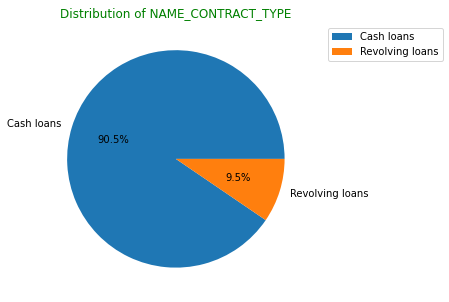

In [50]:
# Distribution based on contract type of loan
plt.figure(figsize=[5,5])
plt.pie(df1['NAME_CONTRACT_TYPE'].value_counts(), labels=['Cash loans', 'Revolving loans'], autopct='%1.1f%%')
plt.title('Distribution of NAME_CONTRACT_TYPE', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

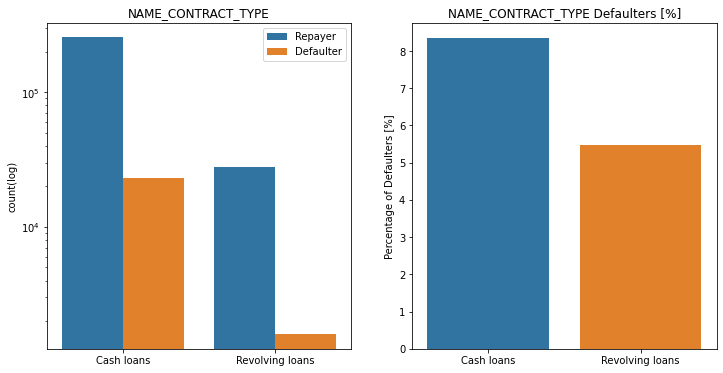

In [51]:
# Checking the contract type based on loan repayment status

# calculate the percentage of target 1 per category value
cat_per= df1[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('NAME_CONTRACT_TYPE')



a= sns.countplot(ax= a1,
                x='NAME_CONTRACT_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['NAME_CONTRACT_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a= sns.barplot(ax= a2,
               x='NAME_CONTRACT_TYPE',
               y= 'TARGET',
               order= cat_per['NAME_CONTRACT_TYPE'],
               data= cat_per
               
)
a2.set_title('NAME_CONTRACT_TYPE Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xlabel('')
plt.show()

## assumption: Revolving loans are less from the total number of loans and majority of the revolving loans have been defaulted.

## CODE_GENDER

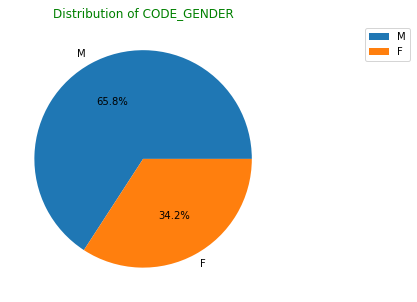

In [52]:
# distribution of the people based on Gender
plt.figure(figsize=[5,5])
plt.pie(df1['CODE_GENDER'].value_counts(), labels=list(pd.unique(df1['CODE_GENDER'])), autopct='%1.1f%%')
plt.title('Distribution of CODE_GENDER', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

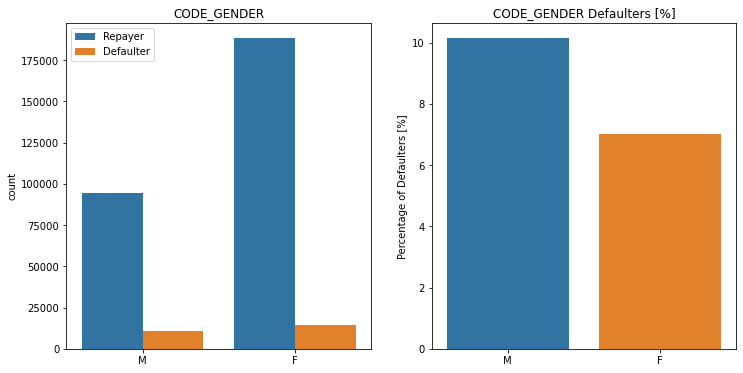

In [53]:
# checking type of Gender on loan repayment status
# calculate the percentage of target 1 per category value
cat_per= df1[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('CODE_GENDER')



a= sns.countplot(ax= a1,
                x='CODE_GENDER',
                data=df1,
                hue='TARGET',
                order=cat_per['CODE_GENDER'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a= sns.barplot(ax= a2,
               x='CODE_GENDER',
               y= 'TARGET',
               order= cat_per['CODE_GENDER'],
               data= cat_per
               
)
a2.set_title('CODE_GENDER Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xlabel('')
plt.show()

## Assumption : female customer is double the number of male customer.
## Males have higher chance of not returning their loans comparing with women (apporx 7%)

## FLAG_OWN_CAR

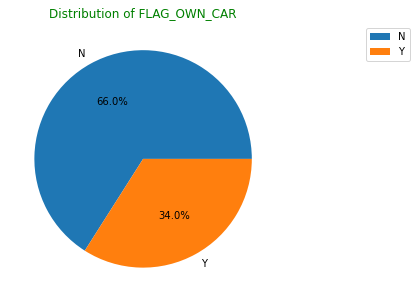

In [54]:
# distribution of people owning a car vs not owning the car
plt.figure(figsize=[5,5])
plt.pie(df1['FLAG_OWN_CAR'].value_counts(), labels=list(pd.unique(df1['FLAG_OWN_CAR'])), autopct='%1.1f%%')
plt.title('Distribution of FLAG_OWN_CAR', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

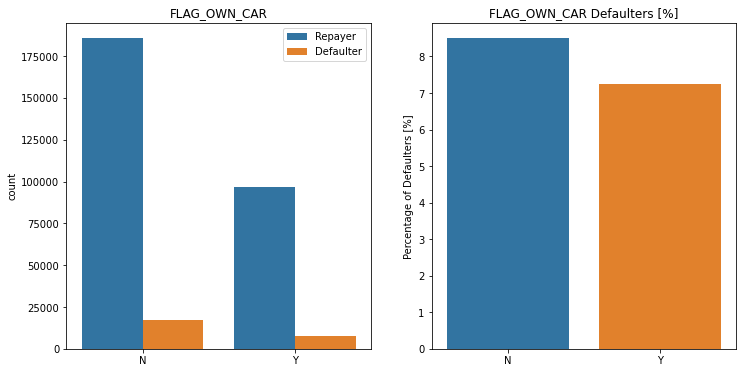

In [55]:
# checking if owning a car related to loan repayment status
# calculate the percentage of target 1 per category value
cat_per= df1[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('FLAG_OWN_CAR')



a= sns.countplot(ax= a1,
                x='FLAG_OWN_CAR',
                data=df1,
                hue='TARGET',
                order=cat_per['FLAG_OWN_CAR'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a= sns.barplot(ax= a2,
               x='FLAG_OWN_CAR',
               y= 'TARGET',
               order= cat_per['FLAG_OWN_CAR'],
               data= cat_per
               
)
a2.set_title('FLAG_OWN_CAR Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xlabel('')
plt.show()

### clients who owning a car and not owing car of ratio is 2:1 
### but there is no correlation between owning a car and loan repayment

## FLAG_OWN_REALTY

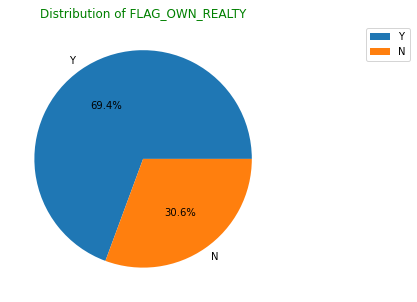

In [56]:
# Distribution of people real property vs not owning property
plt.figure(figsize=[5,5])
plt.pie(df1['FLAG_OWN_REALTY'].value_counts(), labels=list(pd.unique(df1['FLAG_OWN_REALTY'])), autopct='%1.1f%%')
plt.title('Distribution of FLAG_OWN_REALTY', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

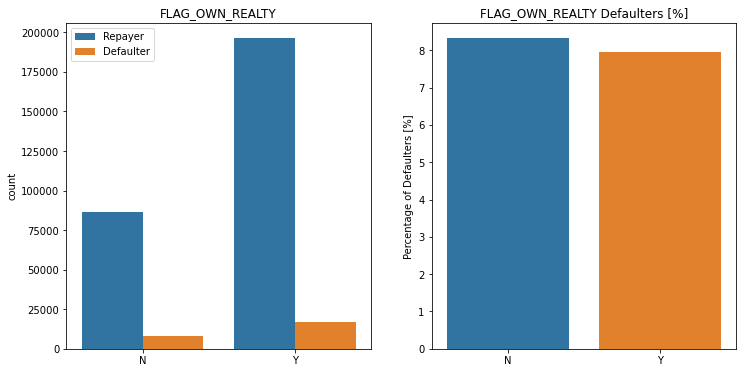

In [57]:
# checking if owning a property is related to loan repayment status
# calculate the percentage of target 1 per category value
cat_per= df1[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('FLAG_OWN_REALTY')



a= sns.countplot(ax= a1,
                x='FLAG_OWN_REALTY',
                data=df1,
                hue='TARGET',
                order=cat_per['FLAG_OWN_REALTY'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a= sns.barplot(ax= a2,
               x='FLAG_OWN_REALTY',
               y= 'TARGET',
               order= cat_per['FLAG_OWN_REALTY'],
               data= cat_per
               
)
a2.set_title('FLAG_OWN_REALTY Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xlabel('')
plt.show()

### Assumption : the clients who own property are more than double of that don't own. 
### But the defaulting rate of both categories are same.

## NAME_HOUSING_TYPE

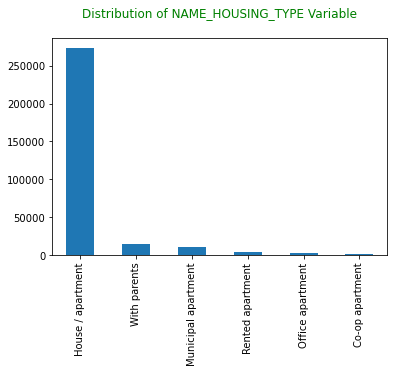

In [58]:
# distribution of Various housing type
df1['NAME_HOUSING_TYPE'].value_counts().plot.bar()
plt.title('Distribution of NAME_HOUSING_TYPE Variable\n', color='green')
plt.show()

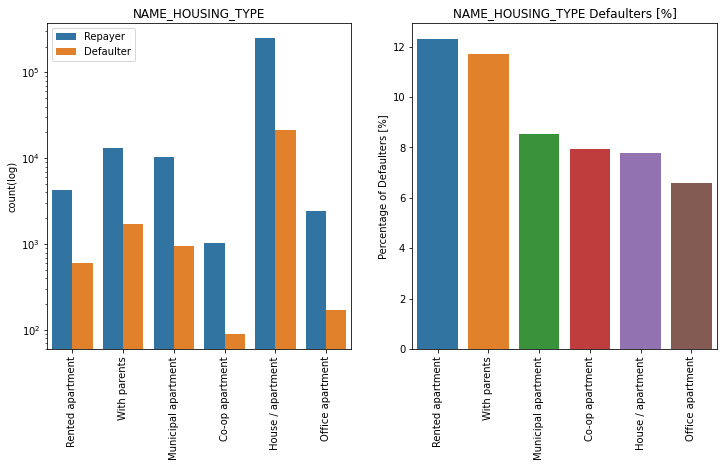

In [59]:
# Analysing Housing type based on loan repayment status
cat_per= df1[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('NAME_HOUSING_TYPE')



a= sns.countplot(ax= a1,
                x='NAME_HOUSING_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['NAME_HOUSING_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='NAME_HOUSING_TYPE',
               y= 'TARGET',
               order= cat_per['NAME_HOUSING_TYPE'],
               data= cat_per
               
)
a2.set_title('NAME_HOUSING_TYPE Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- mostly people live in house/apartment
- office apartment have lowest default rate
- rented apartment and with parents have higher defaulting

## NAME_FAMILY_STATUS

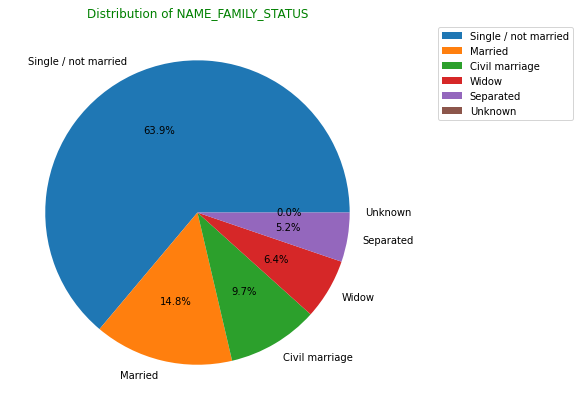

In [60]:
# distribution of status of family
plt.figure(figsize=[15,7])
plt.pie(df1['NAME_FAMILY_STATUS'].value_counts(), labels=list(pd.unique(df1['NAME_FAMILY_STATUS'])), autopct='%1.1f%%')
plt.title('Distribution of NAME_FAMILY_STATUS', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

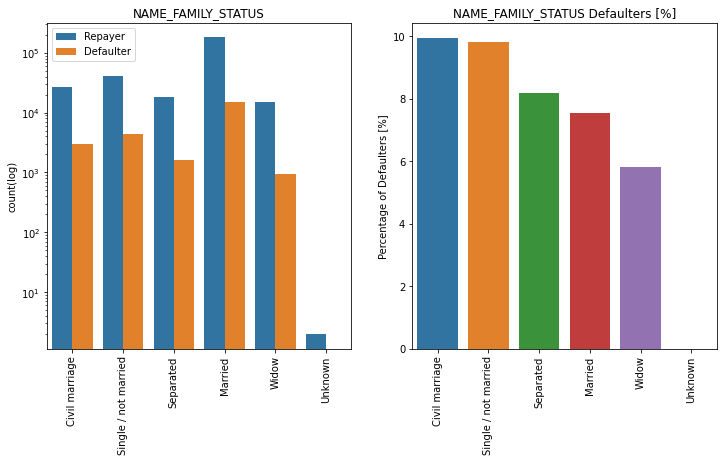

In [61]:
# analying family status based on loan repayment status
cat_per= df1[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('NAME_FAMILY_STATUS')

a= sns.countplot(ax= a1,
                x='NAME_FAMILY_STATUS',
                data=df1,
                hue='TARGET',
                order=cat_per['NAME_FAMILY_STATUS'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='NAME_FAMILY_STATUS',
               y= 'TARGET',
               order= cat_per['NAME_FAMILY_STATUS'],
               data= cat_per
               
)
a2.set_title('NAME_FAMILY_STATUS Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- most of the people who have taken loan are married, followed by single/not married
- civil marriage has highest percentage of not repayment
- widow has lowest percentage of not repayment

## NAME_EDUCATION_TYPE

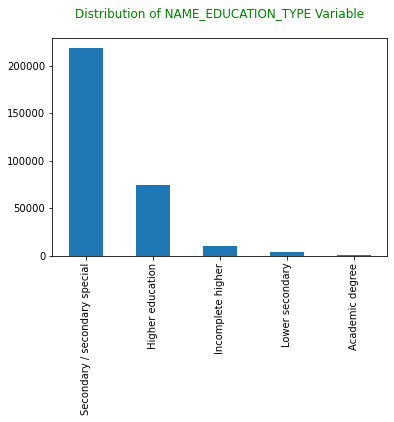

In [62]:
# distribution based on education type
df1['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.title('Distribution of NAME_EDUCATION_TYPE Variable\n', color='green')
plt.show()

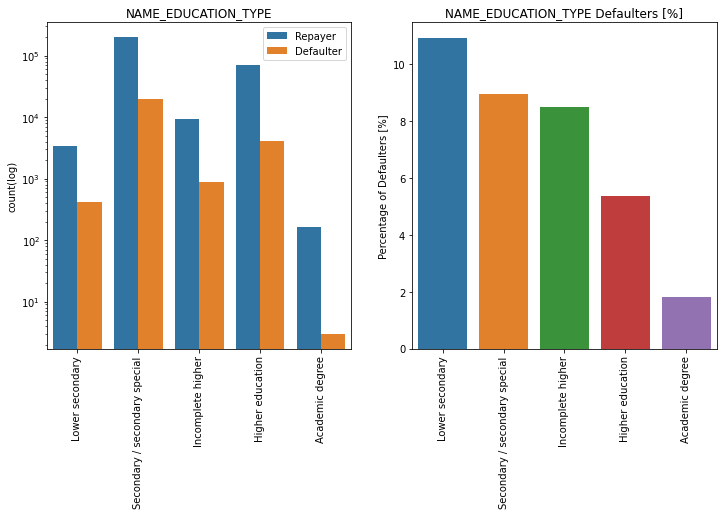

In [63]:
# Analysis education type based on loan repayment status
cat_per= df1[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('NAME_EDUCATION_TYPE')

a= sns.countplot(ax= a1,
                x='NAME_EDUCATION_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['NAME_EDUCATION_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='NAME_EDUCATION_TYPE',
               y= 'TARGET',
               order= cat_per['NAME_EDUCATION_TYPE'],
               data= cat_per
               
)
a2.set_title('NAME_EDUCATION_TYPE Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- Majority of the clients have secondary/ secondary special education followed by clients with higher education .
- the lower secondary category, although rare, have the largest rate of defaulters.


## NAME_INCOME_TYPE

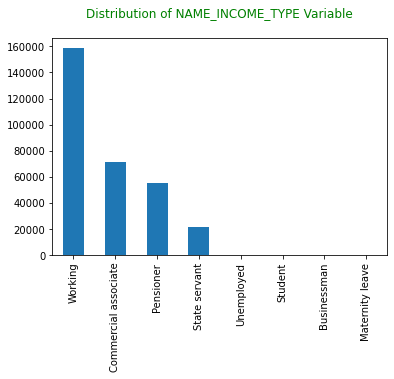

In [64]:
# distribution based on income type
df1['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.title('Distribution of NAME_INCOME_TYPE Variable\n', color='green')
plt.show()

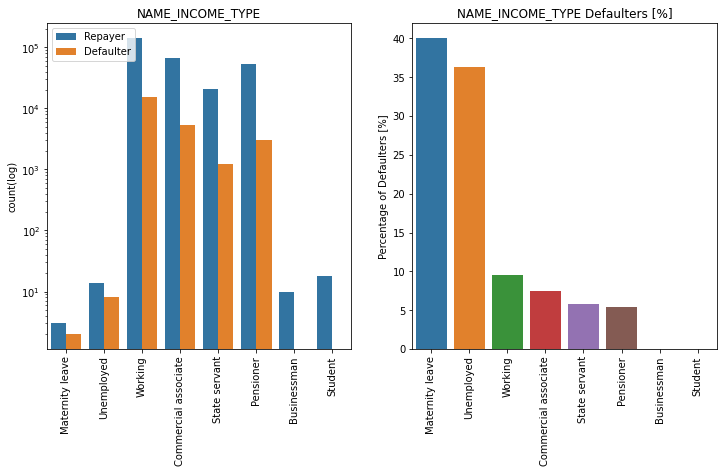

In [65]:
# Analysis income type based on loan repayment status
cat_per= df1[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('NAME_INCOME_TYPE')

a= sns.countplot(ax= a1,
                x='NAME_INCOME_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['NAME_INCOME_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='NAME_INCOME_TYPE',
               y= 'TARGET',
               order= cat_per['NAME_INCOME_TYPE'],
               data= cat_per
               
)
a2.set_title('NAME_INCOME_TYPE Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- Most of clients for loans have income type as followed by commercial associate, Pensioner and state servent.
- The applicants with the type of income maternity leave have almost make 40% ratio of the defaulters.
- Student and bussiness , though less in numbers do not have any default record.
t

###  REGION_RATING_CLIENT

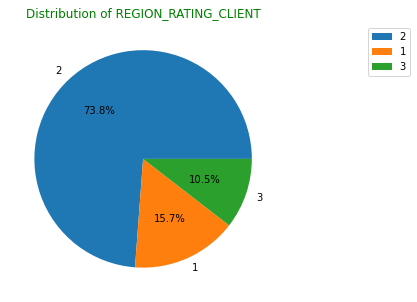

In [66]:
# Distribution of REGION clients living location:
plt.figure(figsize=[5,5])
plt.pie(df1['REGION_RATING_CLIENT'].value_counts(), labels=list(pd.unique(df1['REGION_RATING_CLIENT'])), autopct='%1.1f%%')
plt.title('Distribution of REGION_RATING_CLIENT', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

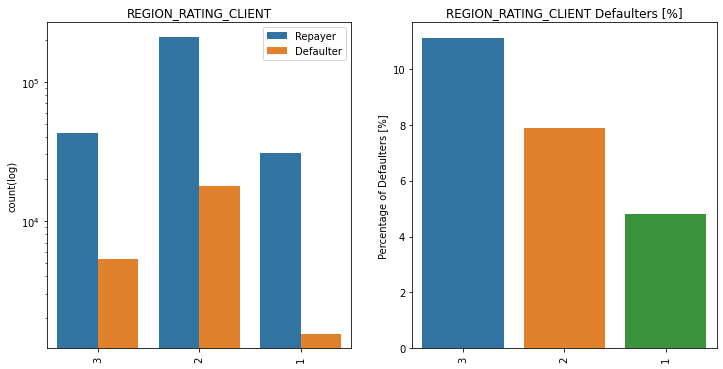

In [67]:
# Analysis region rating where clients lives based on repaymet status
cat_per= df1[['REGION_RATING_CLIENT','TARGET']].groupby(['REGION_RATING_CLIENT'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('REGION_RATING_CLIENT')

a= sns.countplot(ax= a1,
                x='REGION_RATING_CLIENT',
                data=df1,
                hue='TARGET',
                order=cat_per['REGION_RATING_CLIENT'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='REGION_RATING_CLIENT',
               y= 'TARGET',
               order= cat_per['REGION_RATING_CLIENT'],
               data= cat_per
               
)
a2.set_title('REGION_RATING_CLIENT Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- most of the clients are living in rating 2 place
- Region rating 3 has highest default rate
- Region rating 1 has lowest default rate

## OCCUPATION_TYPE

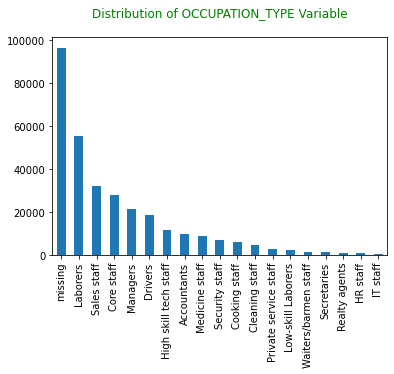

In [68]:
# Distribution of OCCUPATION_TYPE of clients
df1['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.title('Distribution of OCCUPATION_TYPE Variable\n', color='green')
plt.show()

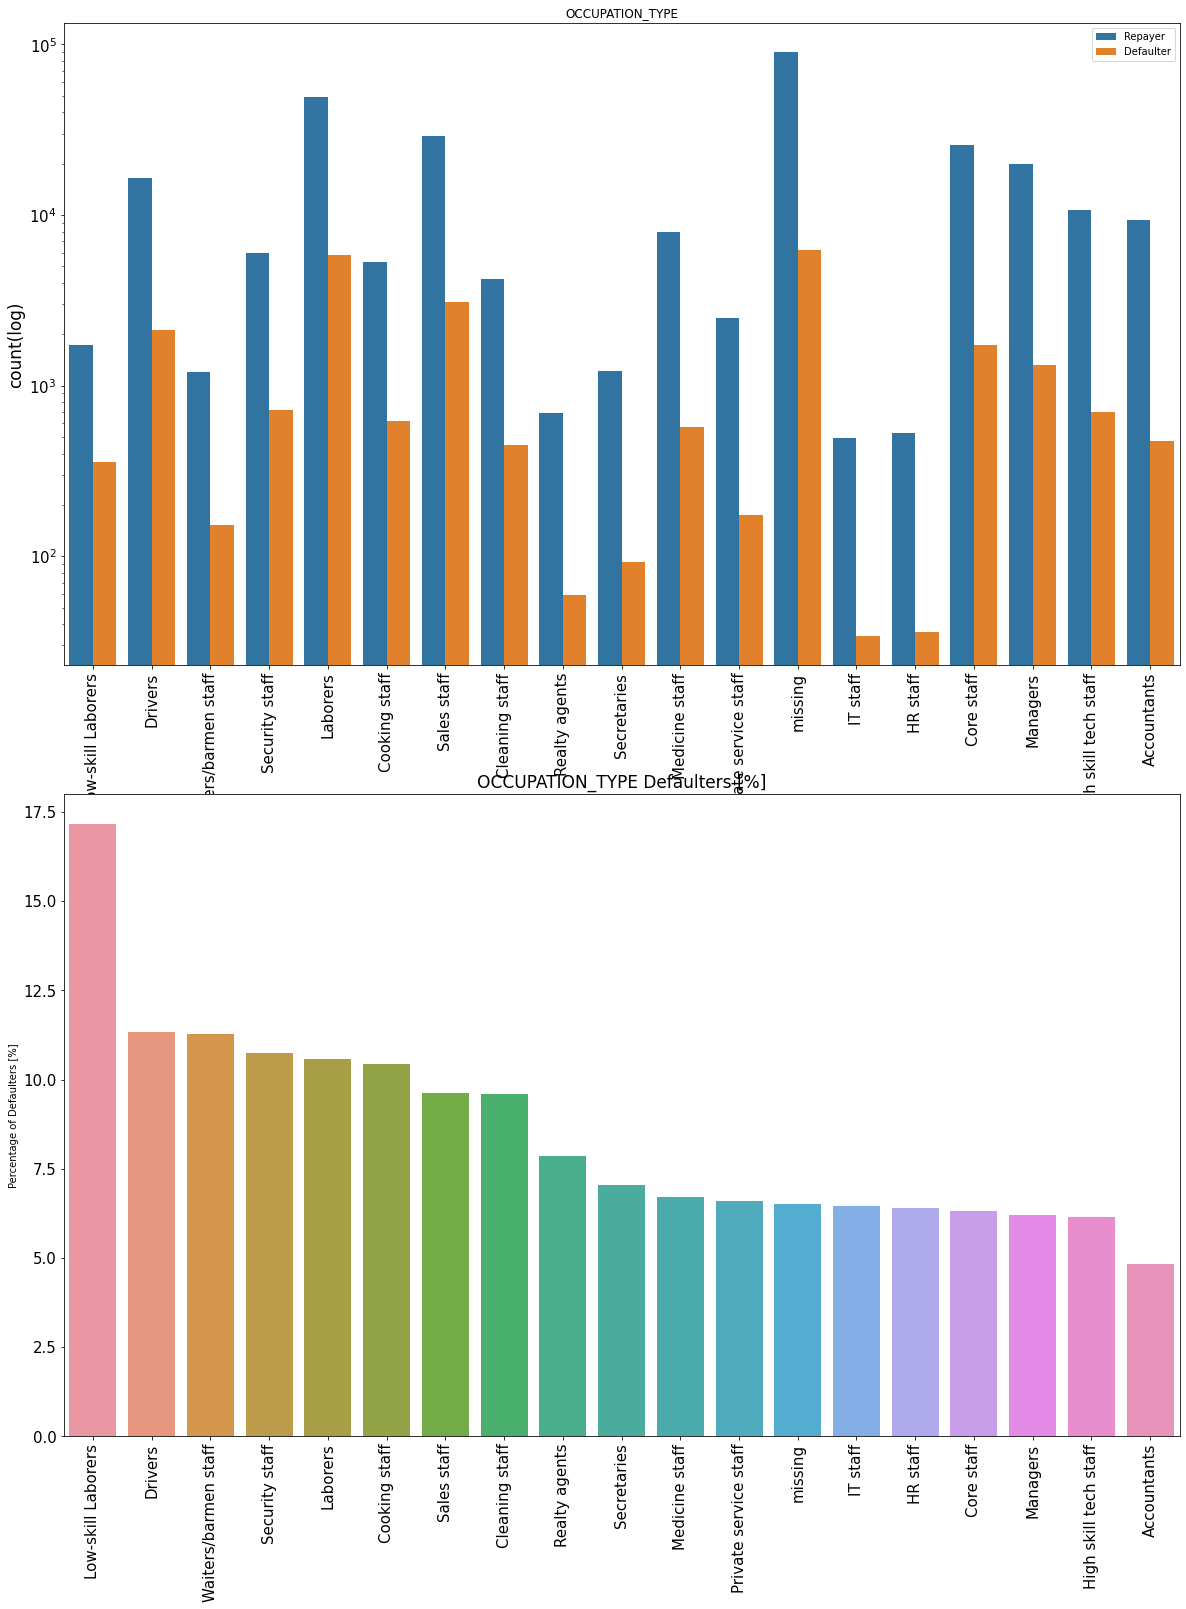

In [69]:
# analysis of occuption type based on loan repayment status
cat_per= df1[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(nrows=2 , figsize=(20,26))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('OCCUPATION_TYPE')

a= sns.countplot(ax= a1,
                x='OCCUPATION_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['OCCUPATION_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)', fontdict={'fontsize': 17, 'fontweight':3})
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a1.tick_params(axis='both', which='major', labelsize=15)
a= sns.barplot(ax= a2,
               x='OCCUPATION_TYPE',
               y= 'TARGET',
               order= cat_per['OCCUPATION_TYPE'],
               data= cat_per
               
)
a2.set_title('OCCUPATION_TYPE Defaulters [%]',fontdict={'fontsize': 17, 'fontweight':3})
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a2.tick_params(axis='both', which='major', labelsize=15)
a.set_xlabel('')
plt.show()

## Assumption:
- Most of the loans are taken by people by whose occuption is 'missing'.
- IT staff take lowest amount of loans
- highest percent of not repaid loans are low- skill laborers.

### ORGANIZATION_TYPE

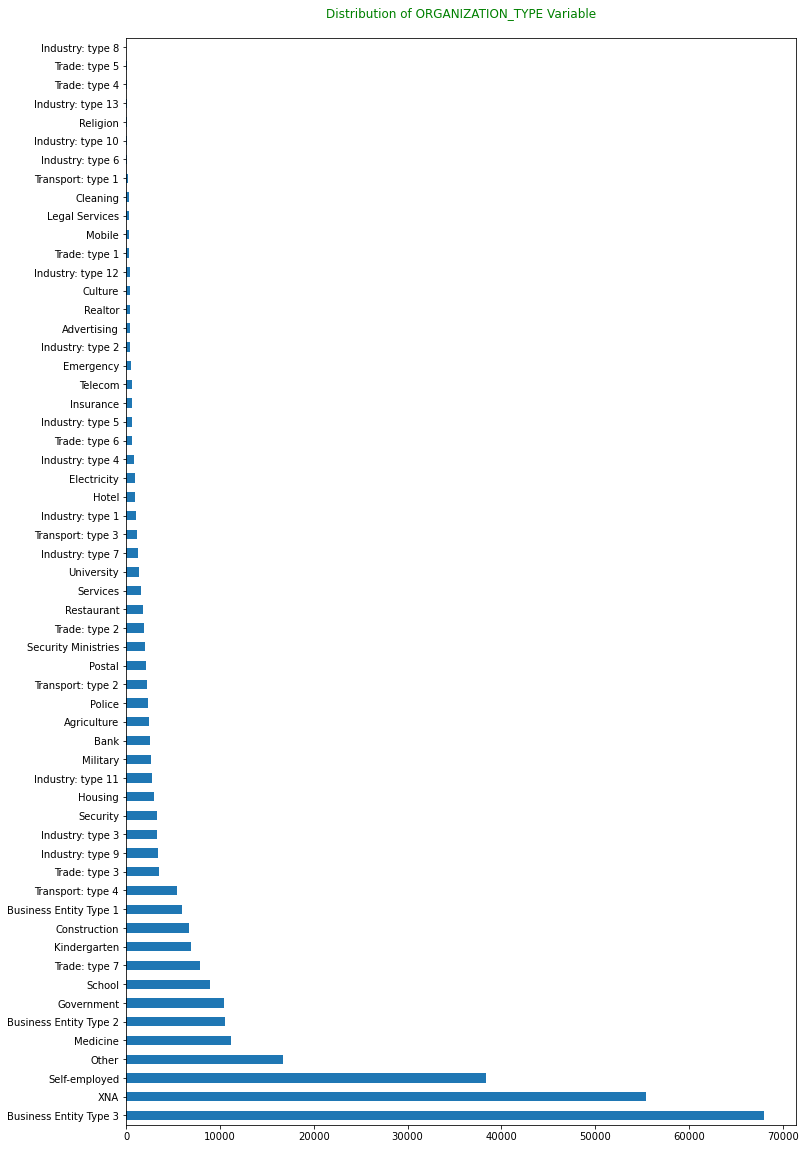

In [70]:
# Distribution of ORGANIZATION_TYPE of the clients
plt.figure(figsize=(12,20))
df1['ORGANIZATION_TYPE'].value_counts().plot.barh()
plt.title('Distribution of ORGANIZATION_TYPE Variable\n', color='green')
plt.show()

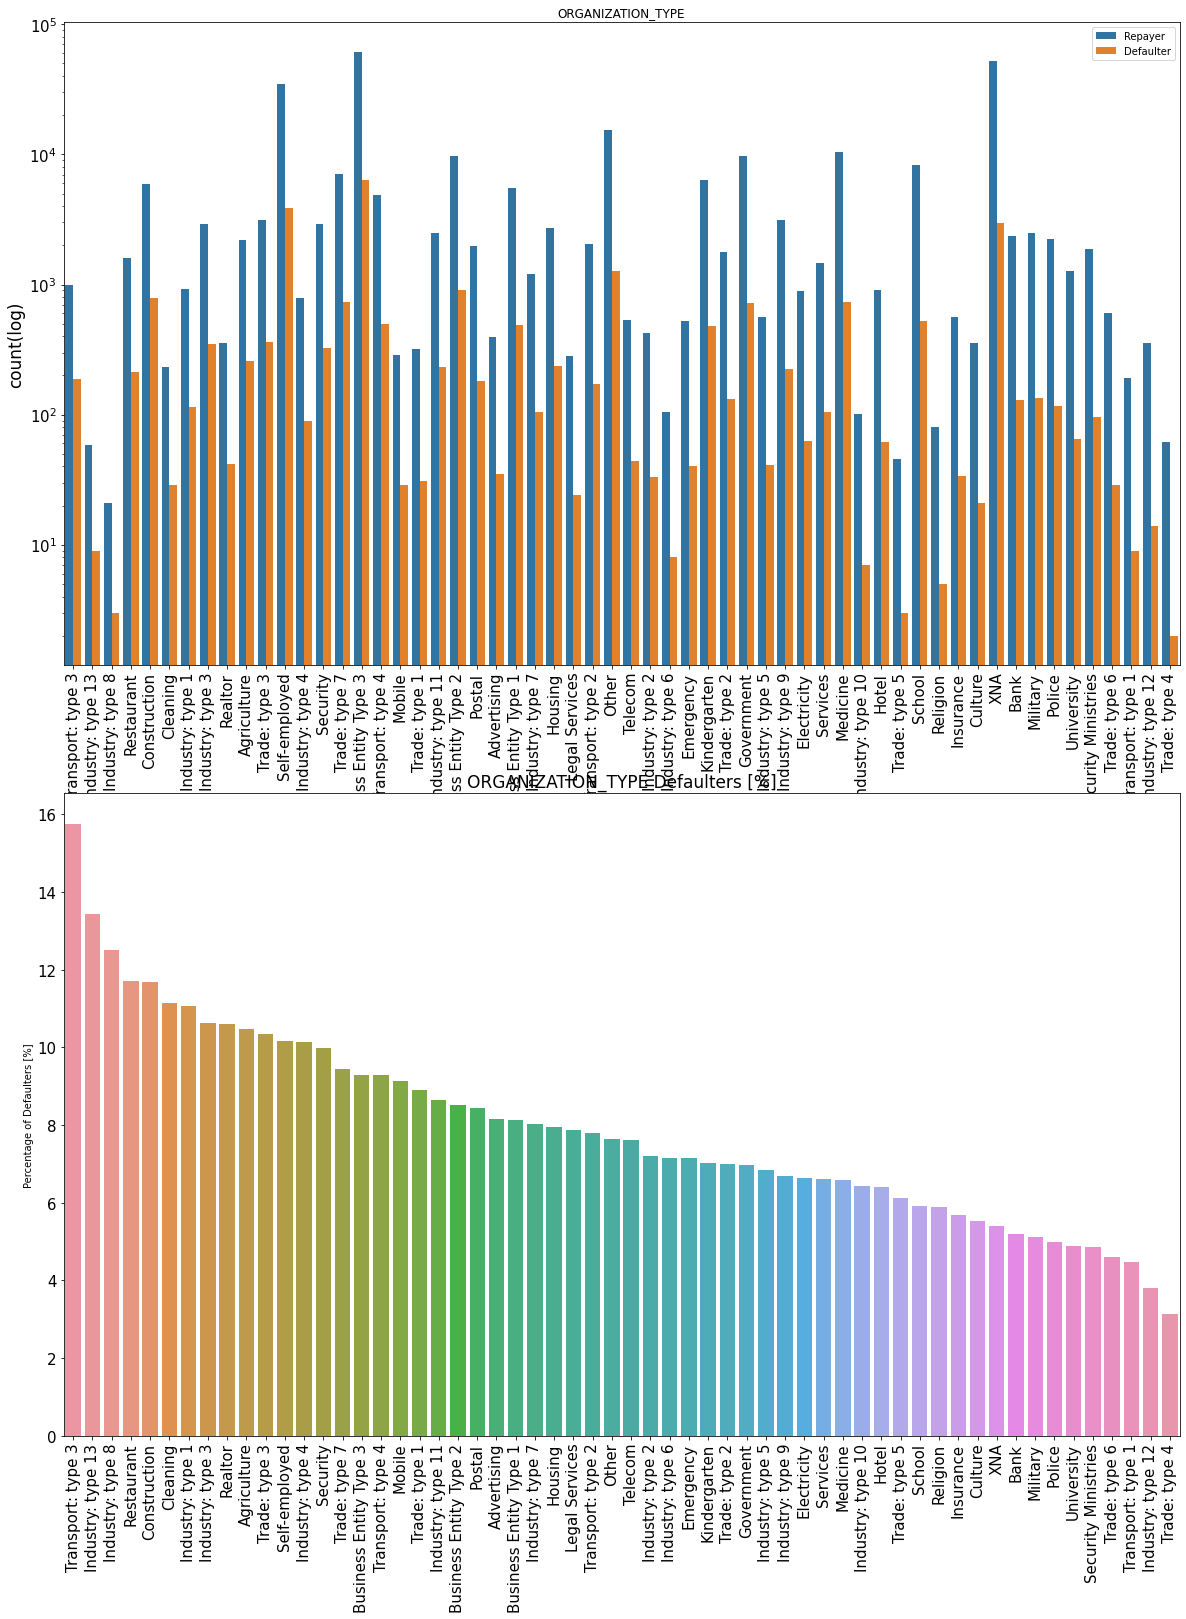

In [71]:
# Checking loan payment based on organization type
cat_per= df1[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(nrows=2 , figsize=(20,26))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('ORGANIZATION_TYPE')

a= sns.countplot(ax= a1,
                x='ORGANIZATION_TYPE',
                data=df1,
                hue='TARGET',
                order=cat_per['ORGANIZATION_TYPE'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)', fontdict={'fontsize': 17, 'fontweight':3})
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a1.tick_params(axis='both', which='major', labelsize=15)
a= sns.barplot(ax= a2,
               x='ORGANIZATION_TYPE',
               y= 'TARGET',
               order= cat_per['ORGANIZATION_TYPE'],
               data= cat_per
               
)
a2.set_title('ORGANIZATION_TYPE Defaulters [%]',fontdict={'fontsize': 17, 'fontweight':3})
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a2.tick_params(axis='both', which='major', labelsize=15)
a.set_xlabel('')
plt.show()

## Assumption:
- most of the clients for loan in bussiness Entity type 3 
- Highest percent of loan not repaid are transport type 3
- For a very high number of clients is unavaiable(XNA)
- trade type 4 is lesser defaulters

## FLAG_DOCUMENT_3

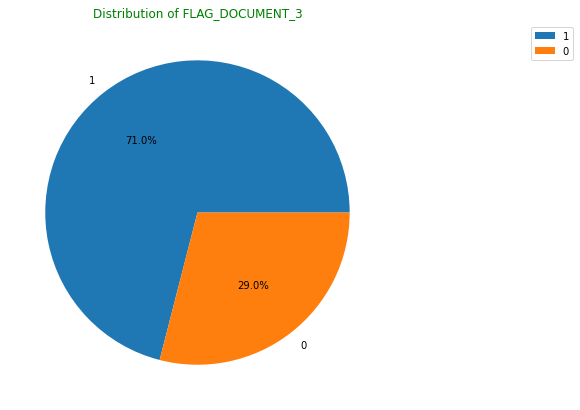

In [72]:
# Distribution of FLAG_DOCUMENT_3 
plt.figure(figsize=[10,7])
plt.pie(df1['FLAG_DOCUMENT_3'].value_counts(), labels=list(pd.unique(df1['FLAG_DOCUMENT_3'])), autopct='%1.1f%%')
plt.title('Distribution of FLAG_DOCUMENT_3', fontdict={'color':'Green'})
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()

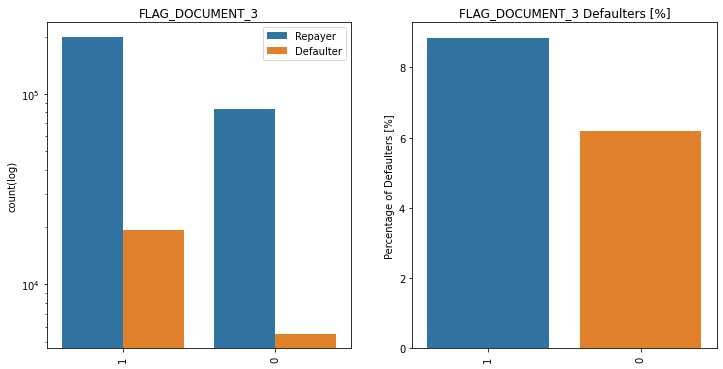

In [73]:
# Analysis FLAG_DOCUMENT_3 submission status based on loan repayment 
cat_per= df1[['FLAG_DOCUMENT_3','TARGET']].groupby(['FLAG_DOCUMENT_3'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('FLAG_DOCUMENT_3')

a= sns.countplot(ax= a1,
                x='FLAG_DOCUMENT_3',
                data=df1,
                hue='TARGET',
                order=cat_per['FLAG_DOCUMENT_3'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='FLAG_DOCUMENT_3',
               y= 'TARGET',
               order= cat_per['FLAG_DOCUMENT_3'],
               data= cat_per
               
)
a2.set_title('FLAG_DOCUMENT_3 Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption ;
- there is no correlation between repayers and defaulters in terms of submitting document 

## CNT_CHILDREN

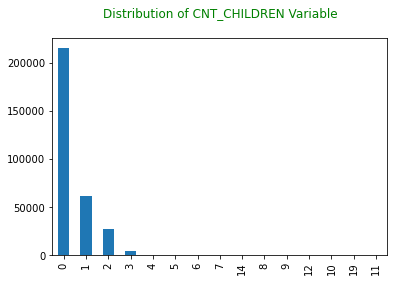

In [74]:
# Distribution of No. of children of clients 
df1['CNT_CHILDREN'].value_counts().plot.bar()
plt.title('Distribution of CNT_CHILDREN Variable\n', color='green')
plt.show()

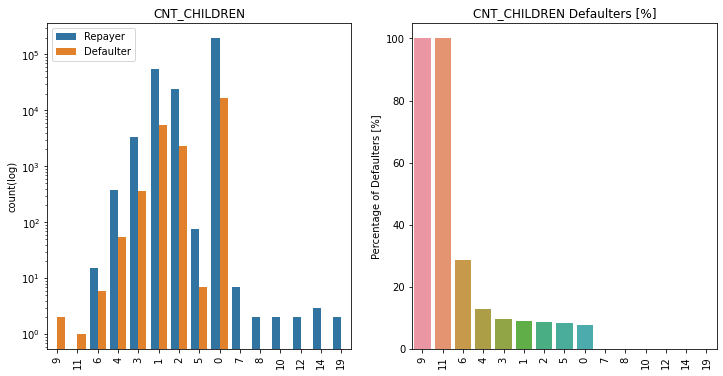

In [75]:
# Analysis number of children based on loan repayment status
cat_per= df1[['CNT_CHILDREN','TARGET']].groupby(['CNT_CHILDREN'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(1,2 ,sharex= True, figsize=(12,6))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('CNT_CHILDREN')

a= sns.countplot(ax= a1,
                x='CNT_CHILDREN',
                data=df1,
                hue='TARGET',
                order=cat_per['CNT_CHILDREN'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a= sns.barplot(ax= a2,
               x='CNT_CHILDREN',
               y= 'TARGET',
               order= cat_per['CNT_CHILDREN'],
               data= cat_per
               
)
a2.set_title('CNT_CHILDREN Defaulters [%]')
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_xlabel('')
plt.show()

## Assumption:
- most of the clients do not have children
- very few client have more than 3 children
- client who have child count 9 and 11 showing 100% default rate

## CNT_FAM_MEMBERS

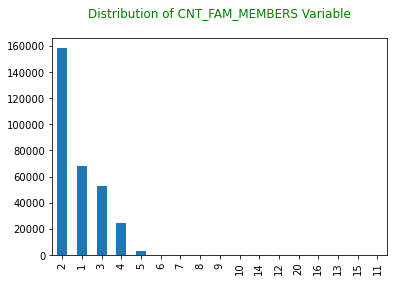

In [76]:
# Distribution of No. of family member of client
df1['CNT_FAM_MEMBERS'].value_counts().plot.bar()
plt.title('Distribution of CNT_FAM_MEMBERS Variable\n', color='green')
plt.show()

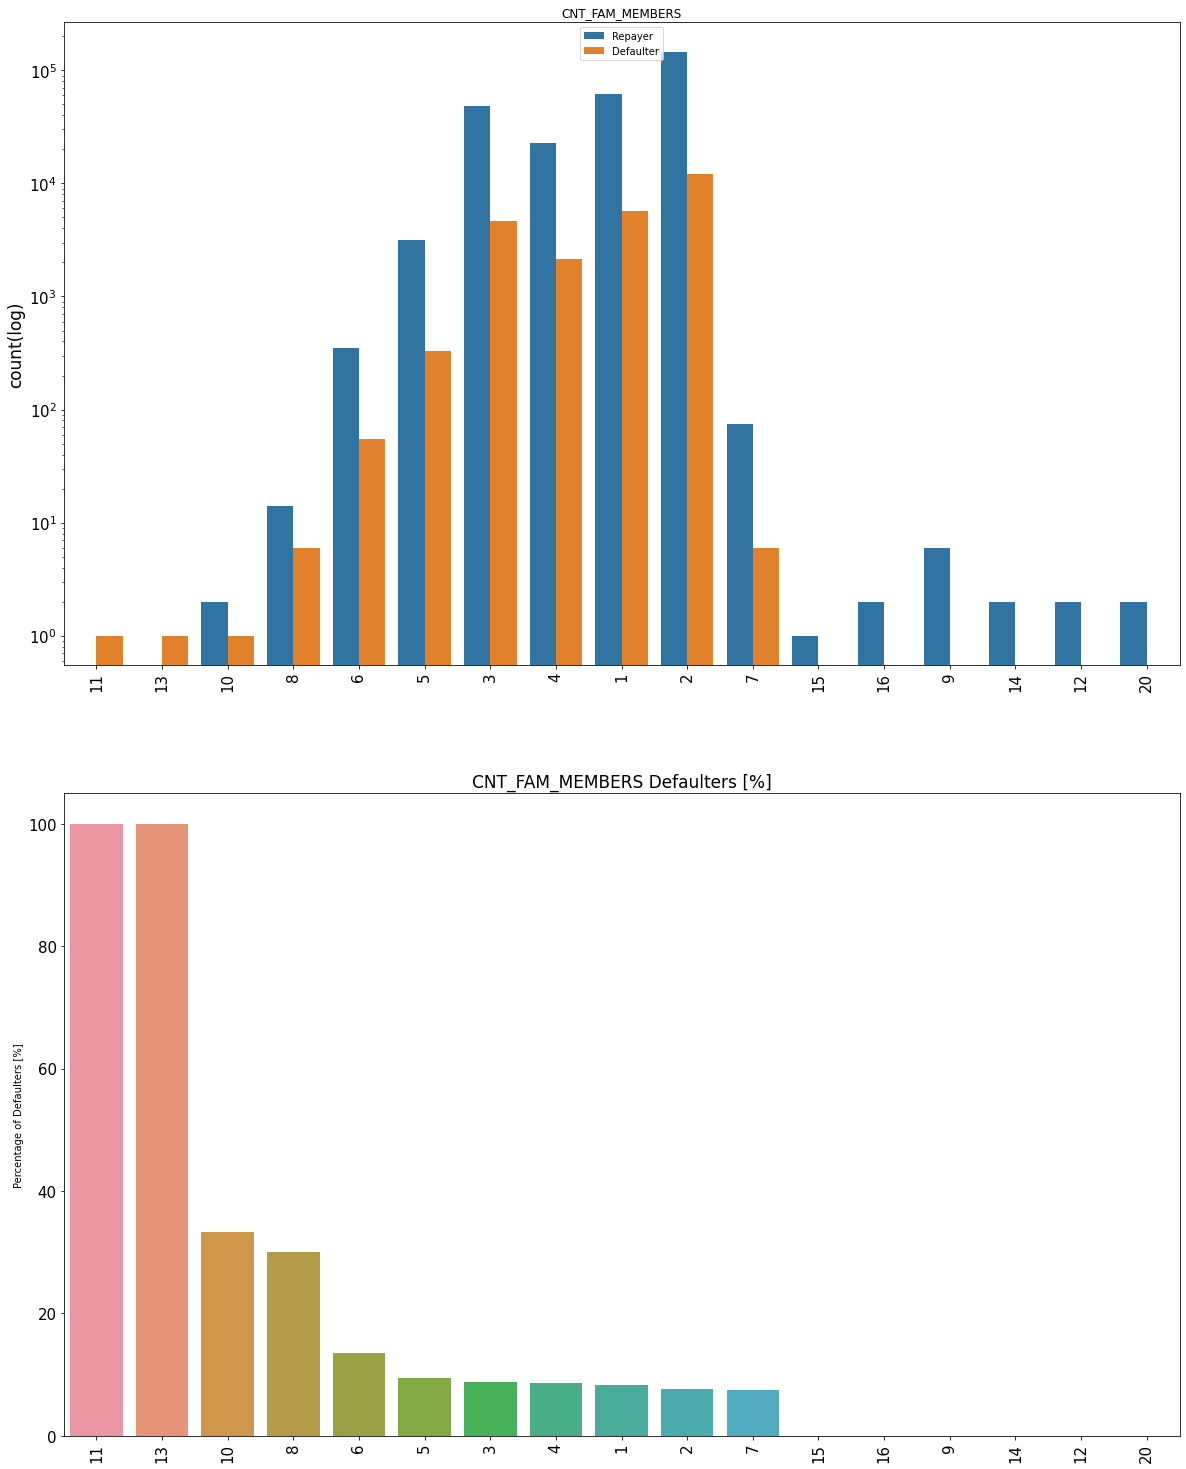

In [77]:
# Analysis number of family member based on loan repayment status
cat_per= df1[['CNT_FAM_MEMBERS','TARGET']].groupby(['CNT_FAM_MEMBERS'],as_index=False).mean()
cat_per['TARGET']= cat_per['TARGET']*100
cat_per.sort_values(by='TARGET', ascending= False, inplace= True)

# for subplot
fig, axes= plt.subplots(nrows=2 , figsize=(20,26))

# subplot 1 : count plot of categorical column
a1= axes[0]
a2= axes[1]

# define common styling
a1.set_title('CNT_FAM_MEMBERS')

a= sns.countplot(ax= a1,
                x='CNT_FAM_MEMBERS',
                data=df1,
                hue='TARGET',
                order=cat_per['CNT_FAM_MEMBERS'],
                )
a1.legend(['Repayer', 'Defaulter'])
a.set_xlabel('')
a1.set_yscale('log')
a1.set_ylabel('count(log)', fontdict={'fontsize': 17, 'fontweight':3})
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a1.tick_params(axis='both', which='major', labelsize=15)
a= sns.barplot(ax= a2,
               x='CNT_FAM_MEMBERS',
               y= 'TARGET',
               order= cat_per['CNT_FAM_MEMBERS'],
               data= cat_per
               
)
a2.set_title('CNT_FAM_MEMBERS Defaulters [%]',fontdict={'fontsize': 17, 'fontweight':3})
plt.ylabel('Percentage of Defaulters [%]')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a2.tick_params(axis='both', which='major', labelsize=15)
a.set_xlabel('')
plt.show()

## Assumption:
- Family member shame trend as children 

# Categorical Bi/Multivariate Analysis

In [78]:
# observation of income type vs amount of income
df1.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.00000,652500.00000,627226.03581,180000.00000,225000.00000,495000.00000,843750.00000,2250000.00000
Commercial associate,71617.00000,202955.32729,147974.15154,26550.00000,135000.00000,180000.00000,225000.00000,18000090.00000
Maternity leave,5.00000,140400.00000,126856.90758,49500.00000,67500.00000,90000.00000,135000.00000,360000.00000
Pensioner,55362.00000,136401.29227,76650.33125,25650.00000,90000.00000,117000.00000,166500.00000,2250000.00000
State servant,21703.00000,179737.96951,100880.57975,27000.00000,112500.00000,157500.00000,225000.00000,3150000.00000
Student,18.00000,170500.00000,106644.68217,81000.00000,112500.00000,157500.00000,178875.00000,562500.00000
Unemployed,22.00000,110536.36364,88055.07906,26550.00000,54000.00000,78750.00000,135000.00000,337500.00000
Working,158774.00000,163169.88922,307577.68594,25650.00000,112500.00000,135000.00000,202500.00000,117000000.00000


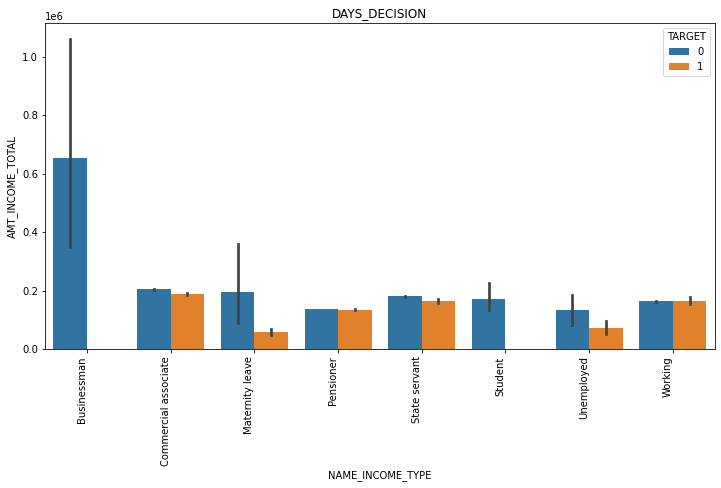

In [79]:
# income type vs income amount range
plt.figure(figsize= (12,6))
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', data= df1, hue='TARGET')
plt.title('DAYS_DECISION')
plt.xticks(rotation= 90, ha='right')
plt.show()

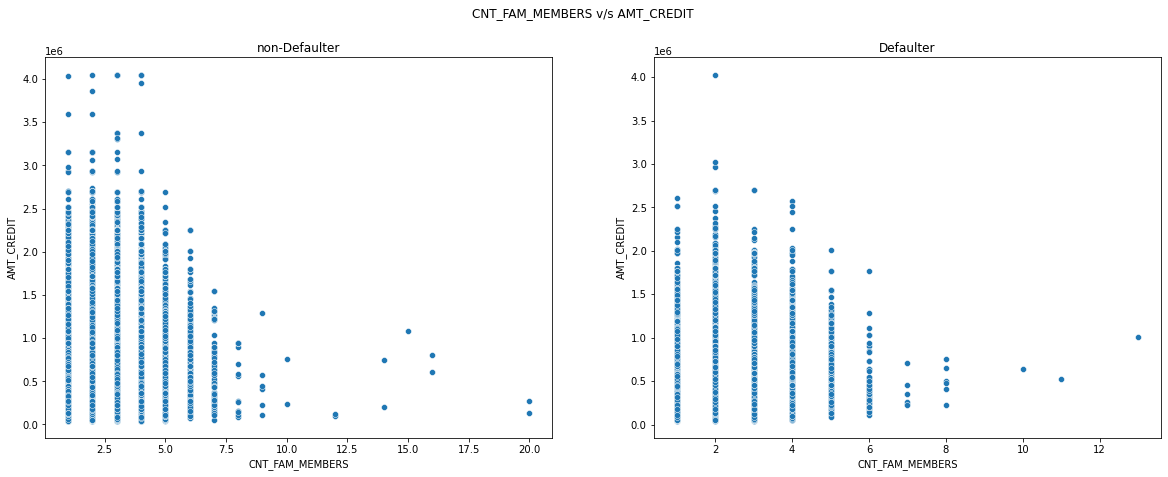

In [80]:
# Analysis CNT_FAM_MEMBERS and AMT_CREDIT Its effect on loan repayment status
plt.figure(figsize=[20,7])
plt.suptitle('CNT_FAM_MEMBERS v/s AMT_CREDIT ')
plt.subplot(1,2,1)
sns.scatterplot(data= target0, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.title('non-Defaulter')
plt.subplot(1,2,2)
sns.scatterplot(data= target1, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.title('Defaulter')
plt.show()


## Observation:
1. applicants having larger family size and less amount credit are likely to default less
2. applicants having smaller family size and higher amount credit are likely to default less

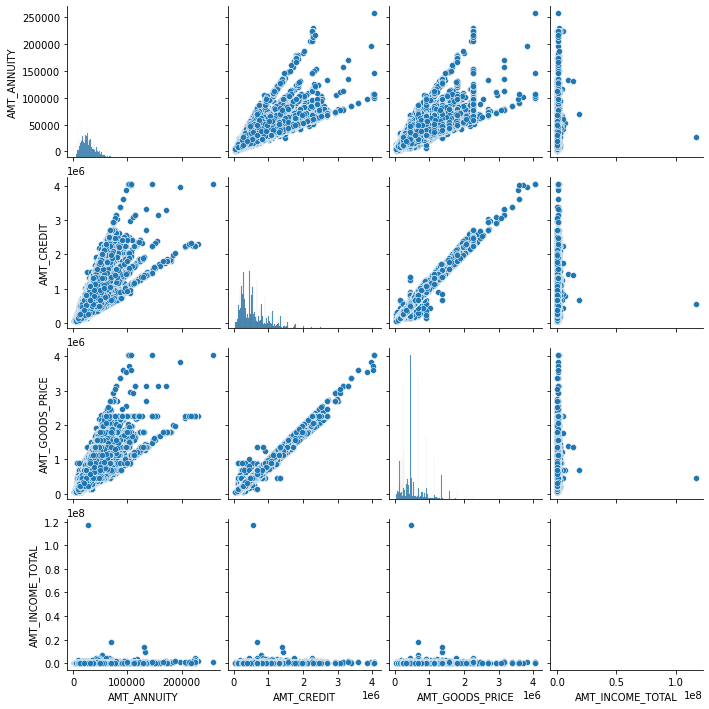

In [81]:
# plotting pairplot between amount variable
sns.pairplot(df1[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL']])
plt.show()


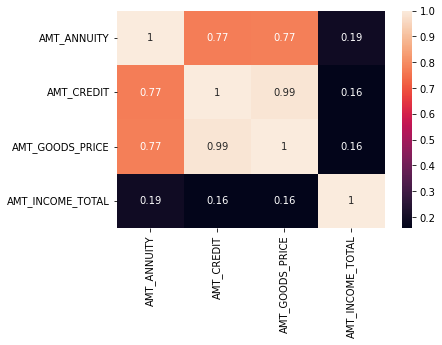

In [82]:
# Correlation between variable
sns.heatmap(df1[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL']].corr(), annot= True )
plt.show()

## observation:
- high correlation between AMT_CREDIT and AMT_GOODS_PRICE 
- clients owning goods of high value can take loans higher amounts

# Numerical Variable Analysis
- The application_data based on Target value 0 and 1 for correlation 

In [83]:
cols_for_correl=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_3','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
repay_df= df1.loc[df1['TARGET']==0, cols_for_correl ]
defaut_df= df1.loc[df1['TARGET']==1, cols_for_correl ]

## Getting the top 10 correlation 


In [84]:
#Getting the top 10 correlation for the Repayers data
corrl_repay= repay_df.corr()
corrl_repay= corrl_repay.where(np.triu(np.ones(corrl_repay.shape), k=1).astype(np.bool))
corrl_df_re= corrl_repay.unstack().reset_index()
corrl_df_re.columns=['VAR1','VAR2','Correlation']
corrl_df_re.dropna(subset=['Correlation'],inplace= True)
corrl_df_re['Correlation']= corrl_df_re['Correlation'].abs()
corrl_df_re.sort_values(by='Correlation', ascending= False, inplace=True)
corrl_df_re.head(10)

,VAR1,VAR2,Correlation
102,AMT_GOODS_PRICE,AMT_CREDIT,0.98702
250,CNT_FAM_MEMBERS,CNT_CHILDREN,0.87857
103,AMT_GOODS_PRICE,AMT_ANNUITY,0.77642
77,AMT_ANNUITY,AMT_CREDIT,0.77130
181,DAYS_EMPLOYED,DAYS_BIRTH,0.62611
76,AMT_ANNUITY,AMT_INCOME_TOTAL,0.41895
101,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.34943
51,AMT_CREDIT,AMT_INCOME_TOTAL,0.34280
150,DAYS_BIRTH,CNT_CHILDREN,0.33697
206,DAYS_REGISTRATION,DAYS_BIRTH,0.33315


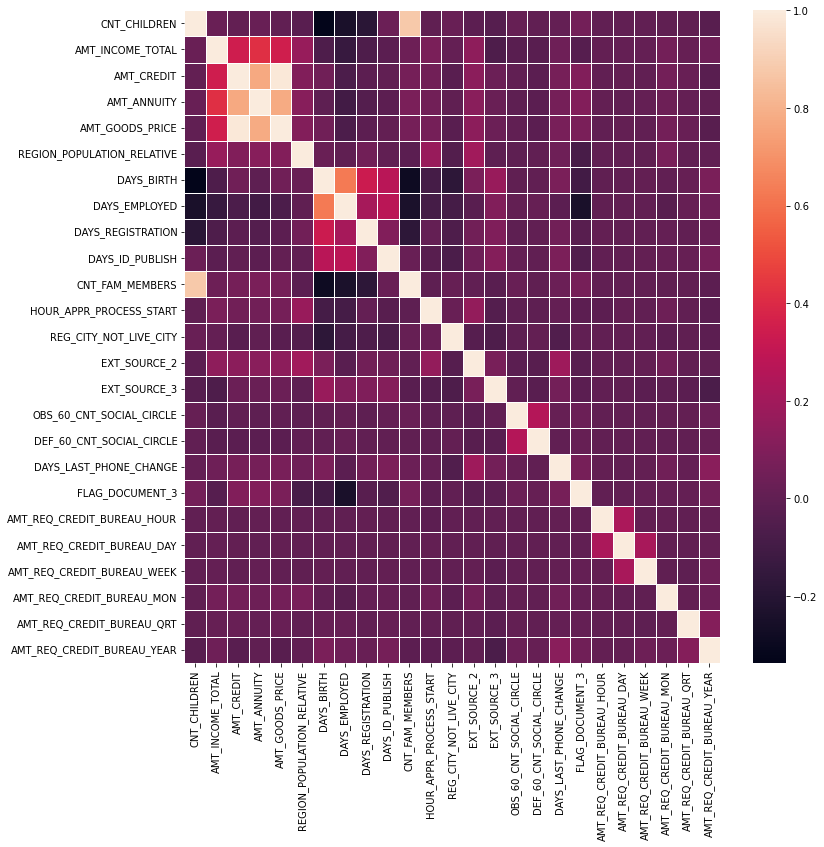

In [85]:
plt.figure(figsize=(12,12 ))
sns.heatmap(repay_df.corr(), linewidths=1)
plt.show()

## Assumption:
- Credit amount is highly correlated with amount of good price, loan annuity and total income

In [89]:
#Getting the top 10 correlation for the Defaulter data
corrl_default= defaut_df.corr()
corrl_default= corrl_default.where(np.triu(np.ones(corrl_default.shape), k=1).astype(np.bool))
corrl_df_de= corrl_default.unstack().reset_index()
corrl_df_de.columns=['VAR1','VAR2','Correlation']
corrl_df_de.dropna(subset=['Correlation'],inplace= True)
corrl_df_de['Correlation']= corrl_df_de['Correlation'].abs()
corrl_df_de.sort_values(by='Correlation', ascending= False, inplace=True)
corrl_df_de.head(10)

,VAR1,VAR2,Correlation
102,AMT_GOODS_PRICE,AMT_CREDIT,0.98278
250,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88548
103,AMT_GOODS_PRICE,AMT_ANNUITY,0.75230
77,AMT_ANNUITY,AMT_CREDIT,0.75219
181,DAYS_EMPLOYED,DAYS_BIRTH,0.58219
206,DAYS_REGISTRATION,DAYS_BIRTH,0.28911
457,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.27217
415,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.26436
150,DAYS_BIRTH,CNT_CHILDREN,0.25911
231,DAYS_ID_PUBLISH,DAYS_BIRTH,0.25286


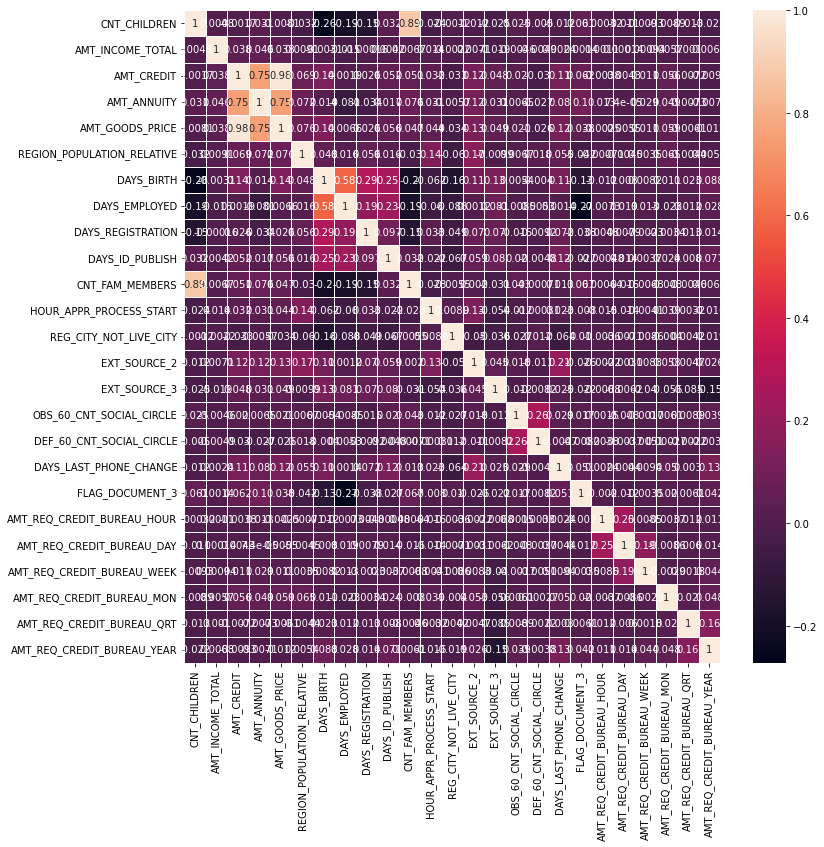

In [90]:
plt.figure(figsize=(12,12 ))
sns.heatmap(defaut_df.corr(), linewidths=1, annot=True)
plt.show()

## Assumption:
- Credit amount is highly correlated with amount of goods price is same as repayes
- But the loan annuity correlation with credit amount has slightly reduced in defaulters when compared to repayers
- these is a severe drop in correlation between total income of the client and credit amount 
- days_birth and number of children correlation has reduced in defaulters when compared to repayers
- there is a slight increase in defaulted to observed count in social among defaulters when compared to repayers

## Numerical Univariate Analysis

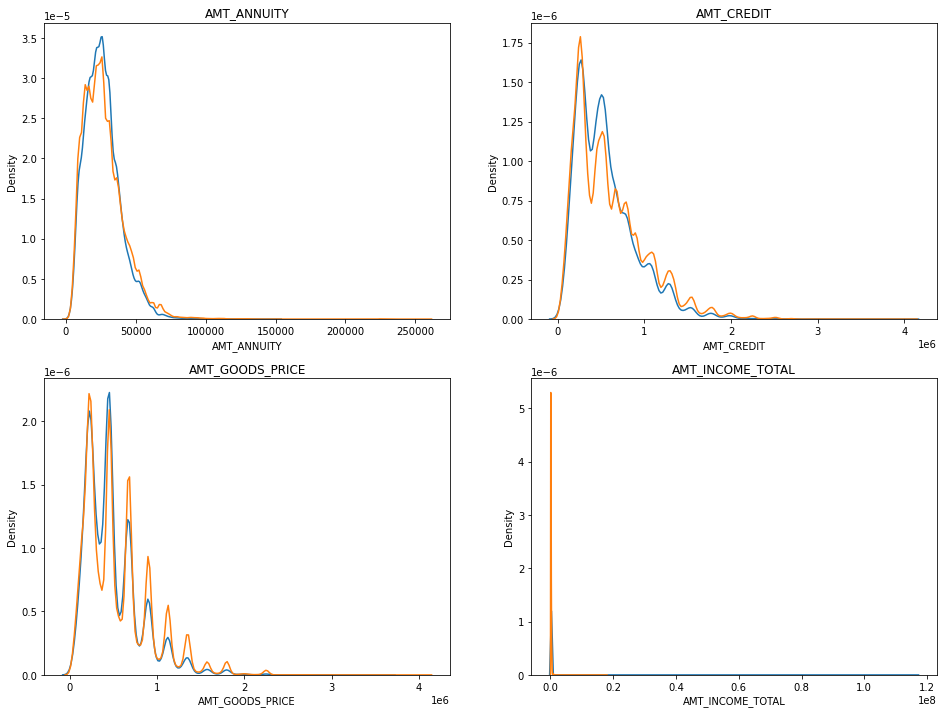

In [88]:
amt= df1[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL']]
plt.figure(figsize=(16,12))
for i in enumerate(amt):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(defaut_df[i[1]],hist=False, label='Defaulter')
    sns.distplot(repay_df[i[1]],hist=False, label='repayer')
    plt.title(i[1])
plt.show()

## Assumption:
- most people pay annuity below 50000 for the credit loan
- the reapayers and defaulter distribution overlap in all plot hence we can not use any of these variables in isolation to make a decision

# Conclusion

### Applicant to be non-defaulter, hence application can be approved
   - CNT_CHILDREN:  APPLICANTS with zero to two children tend to repay to loans
   - NAME_EDUCATION_TYPE : Academic degree has less defaults.
   - NAME_INCOME_TYPE: students and business men have no defaults.
   - ORGANIZATION_TYPE: applicants with trade type 4 and 5 and industry type 8 have defaulted less than 3%.
   - REGION_RATING_CLIENT: applicants who live in rating 1 are safe borrowers.
   
### Applicant to be defaulter , hence application can be rejected:

   - CNT_CHILDREN: applicants who have children equal to or more than 9 default 100% and hence thier application can be rejected.
   - CNT_FAM_MENBERS: applicant who have more than 11 family members higher default rate and their application rejected.
   - NAME_EDUCATION_TYPE: appliacnts with lower secondary , secondary education and incomplete higher education have higher default rate.
   - NAME_FAMILY_STATUS : Applicants in civil marriege or who are single have higher default rate.
   - NAME_INCOME_TYPE: applicants who are either at maternity leave or unemployed have higher default rate.
   - OCCUPTION_TYPE: applicants who are low-skill laborer,driver and barmen staff default rate is huge
   - ORGANIZATION_TYPE: transport type 3 , industry type 13 people have high defaulting rate and thus should be avoied to be approved for loan 
   - REGION_RATING_CLIENT: applicants who live in areas with region rating as 3 has highest defaults.
    